In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [6]:
# Load the MNIST data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check data dimension
print("X_train data shape is", X_train.shape)
print("y_train data shape is", y_train.shape)
print("X_test data shape is", X_test.shape)
print("y_test data shape is", y_test.shape)

# Check data type
print("X_train data type is", X_train.dtype)
print("y_train data type is", y_train.dtype)
print("X_test data type is", X_test.dtype)
print("y_test data type is", y_test.dtype)

X_train data shape is (50000, 32, 32, 3)
y_train data shape is (50000, 1)
X_test data shape is (10000, 32, 32, 3)
y_test data shape is (10000, 1)
X_train data type is uint8
y_train data type is uint8
X_test data type is uint8
y_test data type is uint8


[4]


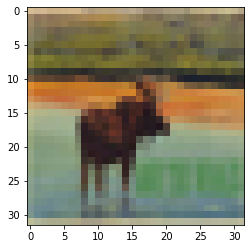

In [7]:
# Visualise sample data
img_index = 66
print(y_train[img_index])
plt.imshow(X_train[img_index])

In [8]:
# Reshaping the array to 3-d for Keras
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# Specify input shape for the mode's 1st layer
input_shape = (32, 32, 3)

# Convert data type to float so we can get decimal points after division
# Also scope down X_train and X_test to 2000:400 samples
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Also scope down y_train and y_test to 2000:400 samples

# Normalising all data by dividing by max brightness value.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [9]:
# Build and compile model
model = Sequential()
model.add( Conv2D(50,(6,6),activation='relu' ,input_shape= (32,32,3)  ) )
model.add(MaxPooling2D((4,4)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax' ))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Fit the model to data
model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/20
157/157 [==============================] - 31s 197ms/step - loss: 1.6773 - accuracy: 0.3826 - val_loss: 1.4535 - val_accuracy: 0.4789
Epoch 2/20
157/157 [==============================] - 31s 198ms/step - loss: 1.3391 - accuracy: 0.5134 - val_loss: 1.2895 - val_accuracy: 0.5459
Epoch 3/20
157/157 [==============================] - 32s 202ms/step - loss: 1.2073 - accuracy: 0.5713 - val_loss: 1.2961 - val_accuracy: 0.5496
Epoch 4/20
157/157 [==============================] - 30s 191ms/step - loss: 1.0939 - accuracy: 0.6111 - val_loss: 1.1240 - val_accuracy: 0.6093
Epoch 5/20
157/157 [==============================] - 30s 190ms/step - loss: 0.9990 - accuracy: 0.6468 - val_loss: 1.0724 - val_accuracy: 0.6299
Epoch 6/20
157/157 [==============================] - 31s 197ms/step - loss: 0.9294 - accuracy: 0.6739 - val_loss: 1.0403 - val_accuracy: 0.6347
Epoch 7/20
157/157 [==============================] - 31s 199ms/step - loss: 0.8563 - accuracy: 0.7005 - val_loss: 1.0106 - val_ac

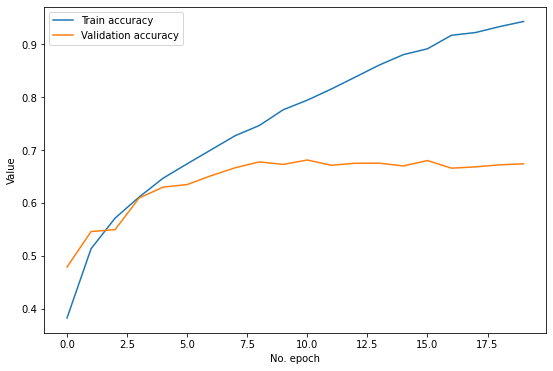

In [11]:
# Review model's progress
plt.figure(figsize=(9,6))
plt.plot(model.history.history['accuracy'], label='Train accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [12]:
# Evaluate model's accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss is", score[0])
print("Accuracy score is", score[1])

Loss is 1.6441218852996826
Accuracy score is 0.6646999716758728


In [14]:
# Evaluate model's accuracy
score = model.evaluate(X_train, y_train, verbose=0)
print("Loss is", score[0])
print("Accuracy score is", score[1])

Loss is 0.4139229655265808
Accuracy score is 0.9036800265312195


Prediction probability array is:
0 : 4.5094694e-08
1 : 1.1241846e-11
2 : 3.6700447e-14
3 : 4.3227218e-17
4 : 2.944839e-17
5 : 1.6466249e-19
6 : 1.0857283e-18
7 : 1.1184253e-18
8 : 1.0
9 : 4.1281295e-10
From which the max choice is: ship


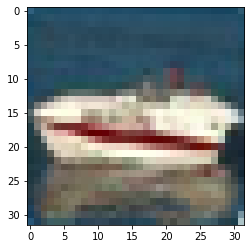

In [15]:
# Make a prediction
image_index = 4444
plt.imshow(X_test[image_index].reshape(32, 32,3),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 32, 32, 3))
print("Prediction probability array is:")

count = 0

x = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in pred.squeeze():
    print(count, ":", i)
    count += 1

print("From which the max choice is:", x[int(pred.argmax())])